# AMAZON SALES DATA ANALYSIS

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Read the Excel file into a pandas DataFrame
data= pd.read_csv('E:/Unified_Mentor_Data_Analyst_Internship/Projects/Amazon_Sales_Data_Analysis/Amazon_Sales_data.csv')

# take a brief look at the data
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [2]:
# get info about the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [3]:
# get the dimension of the dataframe
data.shape

(100, 14)

In [4]:
# get the row names of the dataframe
data.index

RangeIndex(start=0, stop=100, step=1)

In [5]:
# get the column names of the dataframe
data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [6]:
data.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [7]:
data.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [8]:
data["Order Date"] = pd.to_datetime(data["Order Date"])
data["Ship Date"] = pd.to_datetime(data["Ship Date"])

In [ ]:
data["Region"] = data["Region"].astype(str)
data["Country"] = data["Country"].astype(str)
data["Item type"] = data["Item type"].astype(str)
data["Sales Channel"] = data["Sales Channel"].astype(str)
data["Order Priority"] = data["Order Priority"].astype(str)

In [ ]:
data["Order Month"] = data["Order Date"].dt.month
data["Order Year"] = data["Order Date"].dt.year

data = data.drop(columns=["Order Date"])

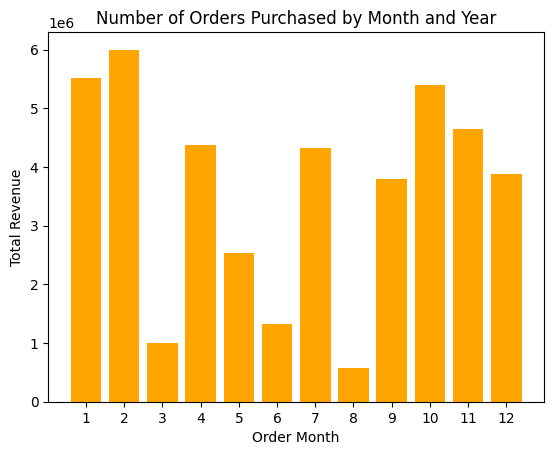

In [ ]:
plt.bar(data["Order Month"], data["Total Revenue"], color= "orange")
plt.title("Number of Orders Purchased by Month and Year")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.xlabel("Order Month")
plt.ylabel("Total Revenue")
plt.show()

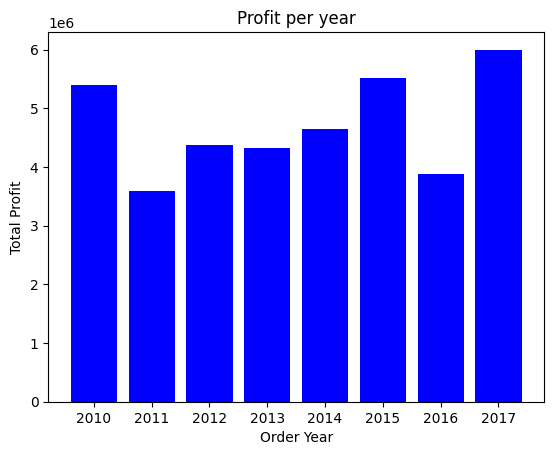

In [ ]:
plt.bar(data["Order Year"], data["Total Revenue"], color= "blue")
plt.title("Profit per year")
plt.xlabel("Order Year")
plt.ylabel("Total Profit")
plt.show()

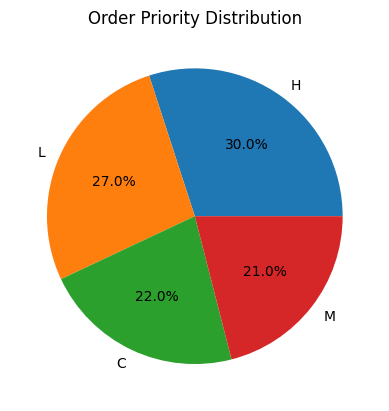

In [ ]:
plt.pie(data["Order Priority"].value_counts(), labels=data["Order Priority"].value_counts().index, autopct="%1.1f%%")
plt.title("Order Priority Distribution")
plt.show()

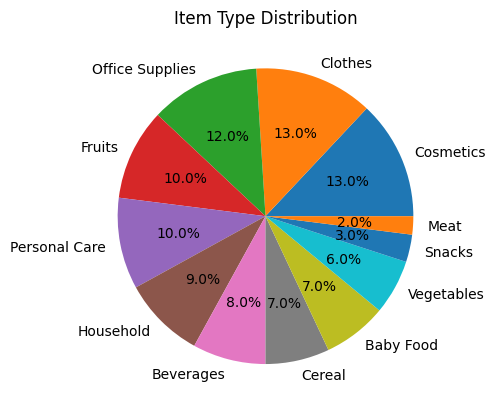

In [ ]:
plt.pie(data["Item Type"].value_counts(), labels=data["Item Type"].value_counts().index, autopct="%1.1f%%")
plt.title("Item Type Distribution")
plt.show()

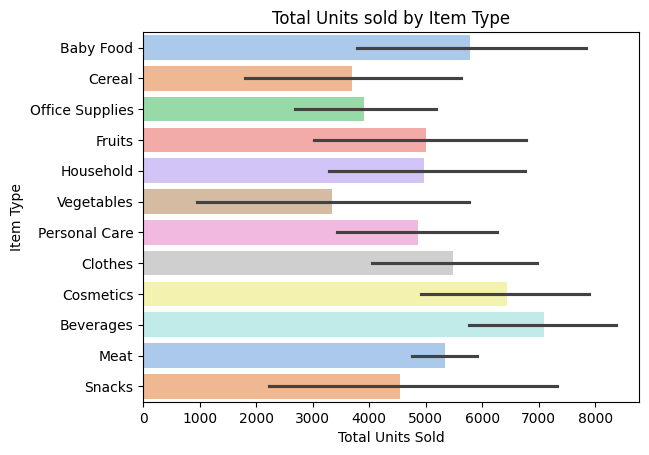

In [ ]:
sns.barplot(x=data["Units Sold"], y=data["Item Type"], palette= "pastel")
plt.xlabel("Total Units Sold")
plt.ylabel("Item Type")
plt.title("Total Units sold by Item Type")
plt.show()

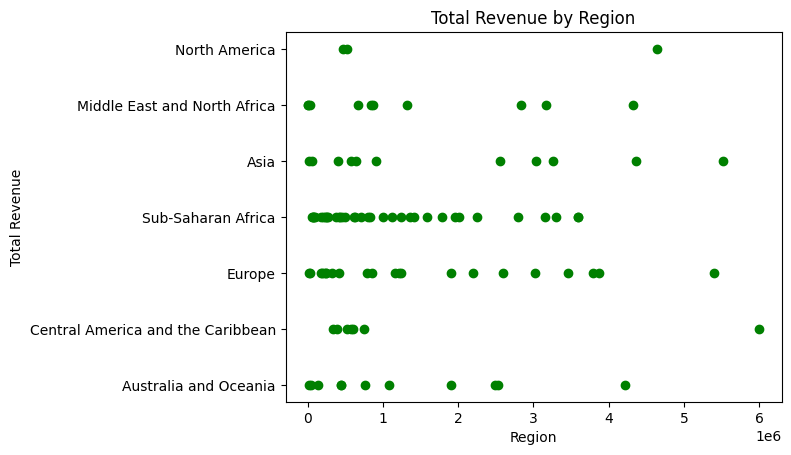

In [11]:
plt.scatter(data["Total Revenue"], data["Region"], color= "green")
plt.xlabel("Region")
plt.ylabel("Total Revenue")
plt.title("Total Revenue by Region")
plt.show()